In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset into python environment


In [4]:
data=pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Make ‘PassengerId’ as the index column

In [5]:
data.set_index("PassengerId",inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check the basic details of the dataset


In [6]:
data.shape

(891, 11)

In [8]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

4. Fill in all the missing values present in all the columns in the dataset

In [12]:
data['Age']=data["Age"].fillna(data['Age'].median())
data["Cabin"].fillna(method='bfill', inplace= True)
data["Embarked"].fillna(method='ffill', inplace= True)


In [13]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       1
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

In [14]:
num_columns=['Age', 'Parch', 'Fare']

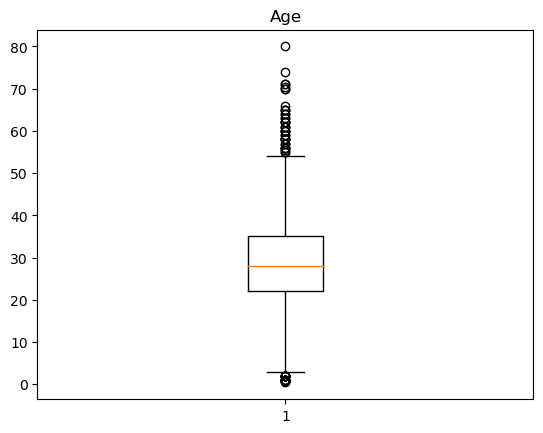

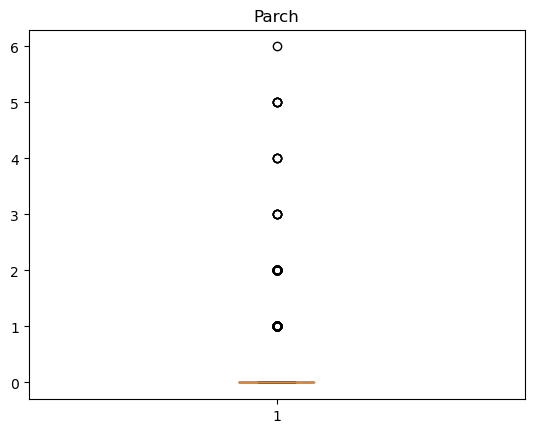

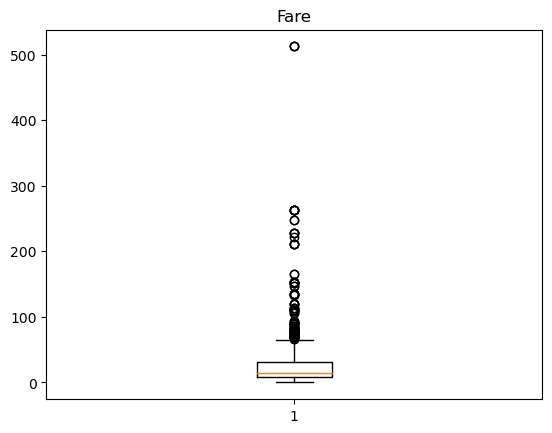

In [15]:
#boxplot
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [16]:
#handling outliers in column parch
P1 = np.percentile(data["Parch"],25,method="midpoint")
P2 = np.percentile(data["Parch"],50,method="midpoint")
P3 = np.percentile(data["Parch"],75,method="midpoint")

In [17]:
print("P1 is",P1)
print("P2 is",P2)
print("P3 is",P3)

P1 is 0.0
P2 is 0.0
P3 is 0.0


In [18]:
IPR = P3 -P1


low_lim = P1 - 1.5*IPR
up_lim = P3 + 1.5*IPR
print("min is", low_lim)
print("max is", up_lim)

min is 0.0
max is 0.0


In [19]:
outlier = []
for x in data['Parch']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [20]:
ind1 = data["Parch"]>up_lim
data.loc[ind1].index

Int64Index([  8,   9,  11,  14,  17,  25,  26,  28,  44,  51,
            ...
            856, 857, 859, 864, 870, 872, 880, 881, 886, 889],
           dtype='int64', name='PassengerId', length=213)

In [24]:
data.drop(data.loc[ind1].index,inplace=True)

In [25]:
#Handling outliers in column fare
Q1 = np.percentile(data["Fare"],25,method="midpoint")
Q2 = np.percentile(data["Fare"],50,method="midpoint")
Q3 = np.percentile(data["Fare"],75,method="midpoint")

In [26]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)


Q1 is 7.8542
Q2 is 10.5
Q3 is 26.0


In [199]:
IQR = Q3 -Q1


low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

min is -19.364500000000003
max is 53.2187


In [27]:
outlier = []
for x in data['Fare']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)


In [28]:
ind2 = data["Fare"]>up_lim
data.loc[ind2].index

Int64Index([  1,   2,   3,   4,   5,   6,   7,  10,  12,  13,
            ...
            878, 879, 882, 883, 884, 885, 887, 888, 890, 891],
           dtype='int64', name='PassengerId', length=663)

In [29]:
data.drop(data.loc[ind2].index,inplace = True)

In [30]:
#Handling outliers in column age
R1 = np.percentile(data["Age"],25,method="midpoint")
R2 = np.percentile(data["Age"],50,method="midpoint")
R3 = np.percentile(data["Age"],75,method="midpoint")

In [31]:
print("R1 is",R1)
print("R2 is",R2)
print("R3 is",R3)

R1 is 28.0
R2 is 28.0
R3 is 37.0


In [32]:
IRR = R3 -R1


low_lim = R1 - 1.5*IRR
up_lim = R3 + 1.5*IRR
print("min is", low_lim)
print("max is", up_lim)

min is 14.5
max is 50.5


In [33]:
outlier = []
for x in data['Age']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)


In [35]:
ind3 = data["Age"]>up_lim
data.loc[ind3].index

Int64Index([], dtype='int64', name='PassengerId')

In [37]:
data.drop(data.loc[ind3].index,inplace = True)

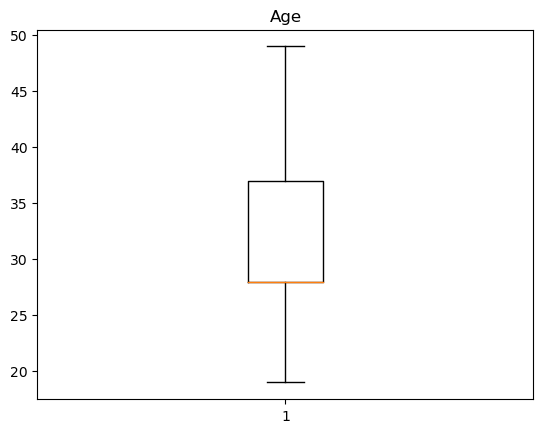

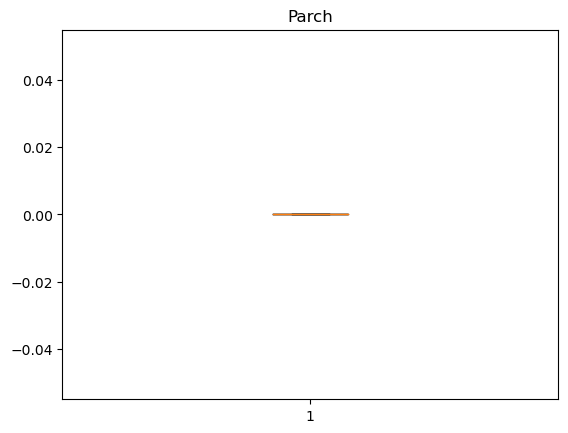

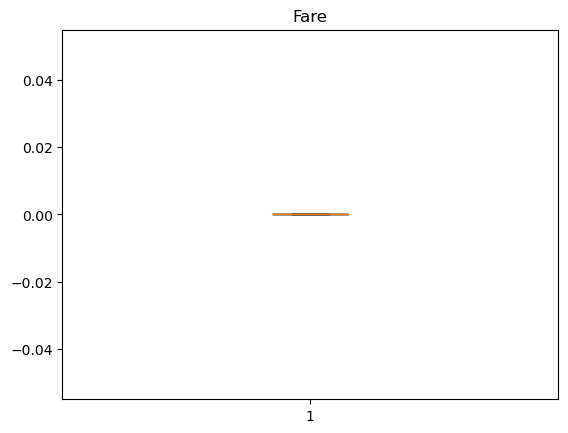

In [38]:
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)



6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
y=data['Survived']
X=data.drop(['Survived'],axis=1)

X=pd.get_dummies(X)

#apply MinMax Scaling
minmax=MinMaxScaler()
minmax_X=minmax.fit_transform(X)

In [41]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,F4,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,C118,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,A19,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,E101,S
